In [ ]:
# Start writing code here...
#test 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/work/world_data_league_2022/stage_one/data_1/Weather_garbage_data_2014-2019.csv", index_col = [0]).drop(columns = ['time'])
df.head()

,Date,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time,tavg,tmin,tmax,prcp,snow,wspd,pres,tsun
0,2014-01-05,"['GARBAGE COLLECTIONS', 'GARBAGE COLLECTIONS',...",9650424.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS LANDFILL...","['GARBAGE COLLECTION', 'GARBAGE COLLECTION', '...","['PAW72', 'PAH71', 'PH34', 'BU06', 'RHBU13', '...","[datetime.time(14, 12), datetime.time(12, 38),...",8.0,-2.1,21.7,0.0,0.0,8.7,1023.5,0.0
1,2014-01-12,"['GARBAGE COLLECTIONS', 'GARBAGE COLLECTIONS',...",9311385.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS - MRF', ...","['GARBAGE COLLECTION', 'GARBAGE COLLECTION', '...","['PAW64', 'PH21', 'RMAU21', 'DA02', 'PAH09', '...","[datetime.time(18, 35), datetime.time(13, 42),...",10.5,-5.5,23.9,6.9,0.0,6.6,1027.3,0.0
2,2014-01-19,"['BULK', 'BULK', 'GARBAGE COLLECTIONS', 'GARBA...",8808898.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS LANDFILL...","['BULK', 'BULK', 'GARBAGE COLLECTION', 'GARBAG...","['BU22', 'BU22', 'PT10', 'PAM85', 'DF1', 'PH32...","[datetime.time(15, 46), datetime.time(14, 1), ...",13.0,2.8,24.4,0.0,0.0,7.0,1022.2,0.0
3,2014-01-26,"['TIRES', 'YARD TRIMMING', 'GARBAGE COLLECTION...",8335148.0,"['MRF', 'HORNSBY BEND', 'TDS LANDFILL', 'TDS -...","['BULK', 'YARD TRIMMINGS', 'GARBAGE COLLECTION...","['BU30', 'YW12', 'PAM70', 'PW22', 'PAH81', 'PM...","[datetime.time(0, 0), datetime.time(12, 50), d...",9.9,-3.2,27.8,2.8,0.0,7.7,1023.2,0.0
4,2014-02-02,"['BULK', 'YARD TRIMMING', 'YARD TRIMMING', 'GA...",7795669.0,"['TDS LANDFILL', 'HORNSBY BEND', 'ORGANICS BY ...","['STORM', 'YARD TRIMMINGS', 'YARD TRIMMINGS-OR...","['STO13', 'YH11', 'OF1', 'PAM73', 'YM05', 'RMB...","[datetime.time(12, 48), datetime.time(16, 15),...",9.5,-2.7,26.7,2.3,0.0,12.3,1020.1,0.0


For modelling, for the columns: Load Type, Dropoff Site, Route Type, Route Number, lets use the most common element

ALT: use set of list

In [ ]:
df_1 = df.copy().drop('Time', axis =1)
df_1['Load Type'] = df_1['Load Type'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Load Type'] = df_1['Load Type'].apply(lambda x: max(set(x), key = x.count))

df_1['Route Number'] = df_1['Route Number'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Route Number'] = df_1['Route Number'].apply(lambda x: max(set(x), key = x.count))


df_1['Route Type'] = df_1['Route Type'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Route Type'] = df_1['Route Type'].apply(lambda x: max(set(x), key = x.count))

df_1['Dropoff Site'] = df_1['Dropoff Site'].apply(lambda x: x.strip("[").strip("]").split(','))
df_1['Dropoff Site'] = df_1['Dropoff Site'].apply(lambda x: max(set(x), key = x.count))


In [ ]:
for col in df_1.columns:
    print(col, df_1[col].nunique())

Date 313
Load Type 1
Load Weight 313
Dropoff Site 1
Route Type 1
Route Number 50
tavg 186
tmin 58
tmax 44
prcp 152
snow 1
wspd 83
pres 139
tsun 1


In [ ]:
df_model = df_1.drop(columns = ['Load Type', 'Dropoff Site', 'Route Type', 'snow', 'tsun'])
df_model['Route Number'] = df_model['Route Number'].astype('category').cat.codes

In [ ]:
correlation_mat = df_model.corr()
"""f = plt.figure(figsize=(19, 15))
sns.heatmap(correlation_mat, annot = True)
plt.show()"""

correlation_mat['Load Weight']

Load Weight     1.000000
Route Number   -0.075736
tavg           -0.151956
tmin           -0.161352
tmax           -0.212371
prcp            0.182740
wspd            0.158965
pres           -0.055669
Name: Load Weight, dtype: float64

## ARIMA

In [ ]:
data = df_model.set_index('Date')
data.head(2)

,Load Weight,Route Number,tavg,tmin,tmax,prcp,wspd,pres
Date,,,,,,,,
2014-01-05,9650424.0,25,8.0,-2.1,21.7,0.0,8.7,1023.5
2014-01-12,9311385.0,35,10.5,-5.5,23.9,6.9,6.6,1027.3


<AxesSubplot:xlabel='Date'>

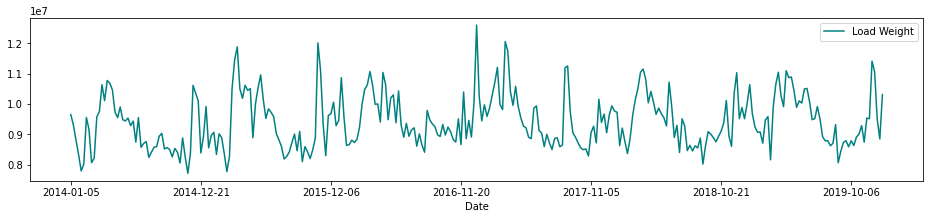

In [ ]:
data.plot(y='Load Weight', color='teal', figsize=(16,3))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

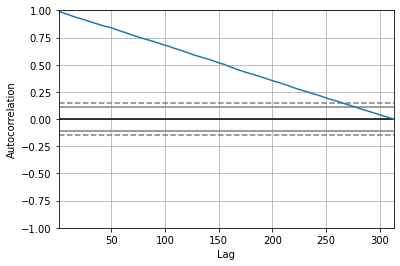

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data) 

In [ ]:
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# fit model
model = ARIMA(data["Load Weight"], order=(1,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
                               SARIMAX Results                                
Dep. Variable:            Load Weight   No. Observations:                  313
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4642.986
Date:                Tue, 22 Mar 2022   AIC                           9293.972
Time:                        00:39:19   BIC                          

#  linear regression

In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, :1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.00724354162455354

Text(0, 0.5, 'y_pred')

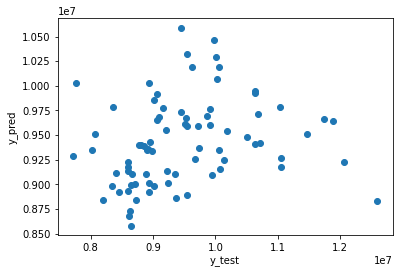

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
#Evaluating the Model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 730184.5452660572
MSE: 1000785444808.2971
RMSE: 1000392.6453189753


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


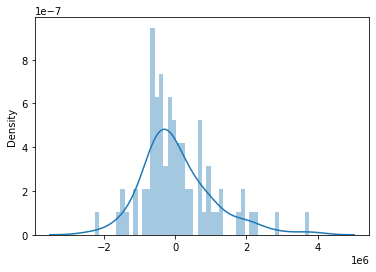

In [ ]:
sns.distplot((y_test-y_pred),bins=50);


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a1cabe9-69f7-4a67-be18-e232e1feb2b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>